In [1]:
!git clone https://github.com/JurjiuDarius/Segmentation-of-Teeth-in-Panoramic-X-ray-Image.git

Cloning into 'Segmentation-of-Teeth-in-Panoramic-X-ray-Image'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 222 (delta 11), reused 10 (delta 3), pack-reused 196
Receiving objects: 100% (222/222), 28.38 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [10]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 14.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append("/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net")

In [4]:
%cd /content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image
!mkdir /content/Data
!cp /content/drive/MyDrive/DentalPanoramicXrays.zip /content/Data

/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image


In [5]:
!pwd

/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image


In [20]:
from process_zip import process_zip
from images_prepare import *
from masks_prepare import *

import os
path = "/content/Data"
process_zip(path)

X, original_sizes = pre_images((512,512),path,True)
Y = pre_splitted_masks(path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Custom_Masks')

X=np.float32(X/255)
Y=np.float32(Y/255)

In [7]:
SPLIT_INDEX = 88
X_test = X[SPLIT_INDEX:]
Y_test = Y[SPLIT_INDEX:]


In [8]:
from keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/dental_xray_seg.keras')


1/1 [==============================] - 0s 42ms/step
(512, 512) float32


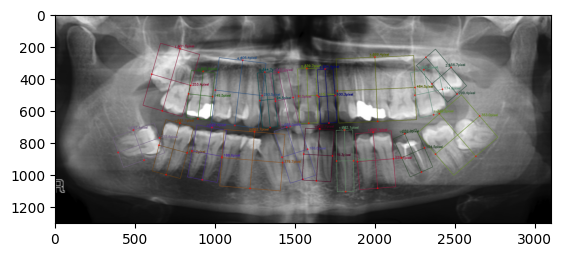

In [28]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from CCA_Analysis import *
import cv2
import numpy as np

predict_img=loaded_model.predict(X_test)
predicted=predict_img[2,:,:,0]


img=X_test[2]
img = cv2.resize(img, (3100, 1300))
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)
img = (img*255).astype(np.uint8)
predicted = (predicted*255).astype(np.uint8)

cca_result,teeth_count=CCA_Analysis(img, predicted,3,2)
plt.imshow(cca_result)

In [59]:
from ultralytics import YOLO
import torch

model = YOLO('/content/drive/MyDrive/DentalImages/TrainingCheckpoints/best_obb_yolo.pt')



0: 256x640 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 640)


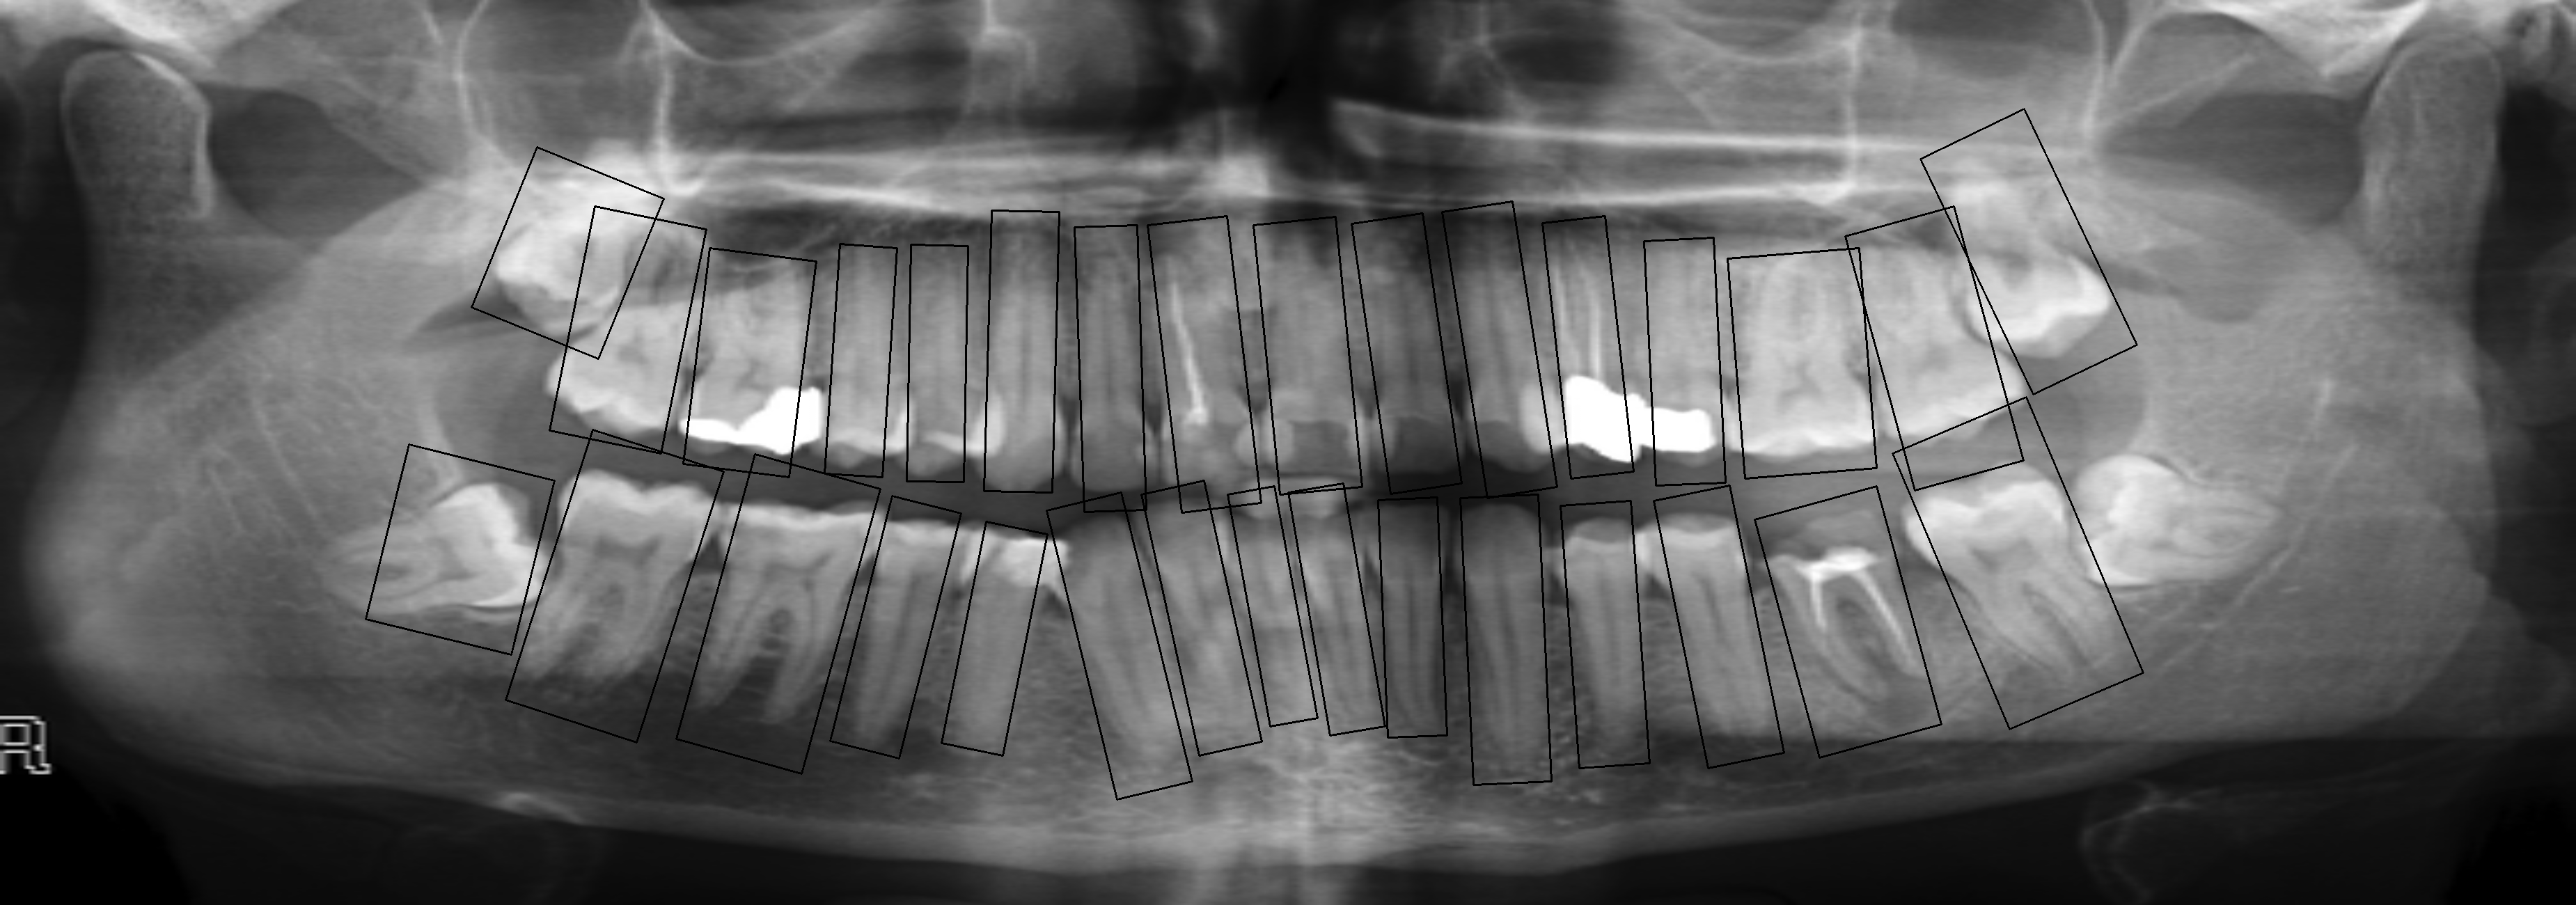

In [70]:
def draw_box(image, box):
    x1, y1, x2, y2, x3, y3, x4, y4 = box.flatten()
    points = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.int32)

    points = points.reshape((-1, 1, 2))
    cv2.polylines(image, [points], True, (0, 255, 0), 2)

original = X_test[2]
original = (original * 255).astype(np.uint8)
original = cv2.resize(original, (3700,1300))
result = model.predict(cv2.cvtColor(original, cv2.COLOR_GRAY2RGB), conf=0.5)
for box in result[0].obb:
  # print(box)
  draw_box(original, torch.Tensor.cpu(box.xyxyxyxy))

cv2_imshow(original)

In [36]:
!pwd

/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image
